In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def initiate_values():
    N, S, M = 4, 5, 5
    lambd = 0.1 # small-but-not-too-small
    return N, S, M, lambd

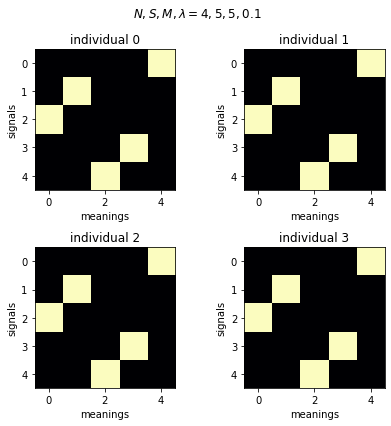

In [24]:
N, S, M, lambd = initiate_values()
phi = np.ones((N, S, M)) / S # phi = 1/S for all speakers

def update_phi(n_steps):

    for i in range(n_steps):

        intend = np.random.choice(M) # meaning intended -- rho = 1/M, uniform distribution
        speaker, listener = np.random.choice(N, size=2, replace=False)
        produce = np.random.choice(S, p=phi[speaker,:,intend]) # the signal produced by the speaker
        # no signal corruption for now
        infer = np.random.choice(M, p=phi[listener,produce,:] / np.sum(phi[listener,produce,:])) # the meaning inferred by the listener

        # updating phi
        feedback = lambd if infer == intend else - lambd 
        # print(feedback)
        phi[speaker,produce,intend] += (feedback * phi[speaker,produce,intend] * (1 - phi[speaker,produce,intend]))
        phi[speaker,:,intend] /= np.sum(phi[speaker,:,intend]) # normalise along signal axis

update_phi(50000)

fig, axs = plt.subplots(2,2, figsize=(6,6), tight_layout=True)
axs = np.ravel(axs)
fig.suptitle(f'$N, S, M, \lambda = {N}, {S}, {M}, {lambd}$')

for i in range(N):
    ax = axs[i]
    im = ax.imshow(phi[i,:,:], cmap='magma')
    ax.set_ylabel('signals')
    ax.set_xlabel('meanings')
    ax.set_title(f'individual {i}')


plt.show()